<a href="https://colab.research.google.com/github/newguy7/DataScienceBootCamp/blob/main/ClassNotes/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# load the dataset
df = pd.read_csv('titanic_Train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Total males and female Passengers
gender_count = df['Sex'].value_counts()
gender_count

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# Total Survived males and female Passengers
survived_count = df.groupby('Sex')['Survived'].sum()
survived_count

Sex
female    233
male      109
Name: Survived, dtype: int64

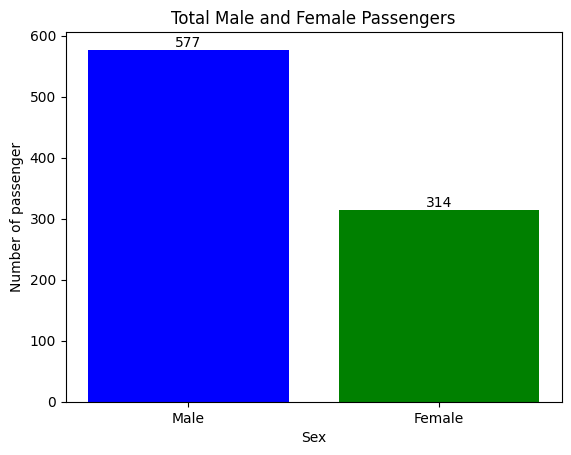

In [ ]:
# How many males and female were travelling
# plot bar chart
x_labels_list = ['Male', 'Female']
y_values_list = [gender_count['male'],gender_count['female']]

plt.bar(x_labels_list,y_values_list,color=['blue','green'])
# show value of each bar
for index, value in enumerate(y_values_list):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Sex')
plt.ylabel('Number of passenger')
plt.title('Total Male and Female Passengers')
plt.show()

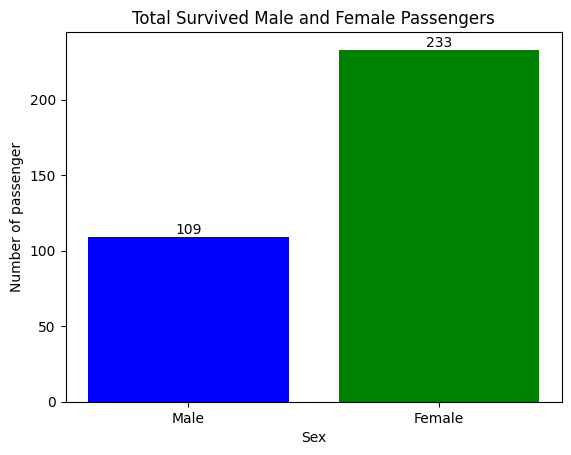

In [ ]:
# How many male survived and how many  female survived
import matplotlib.pyplot as plt

# plot bar chart
x_labels_list = ['Male', 'Female']
y_values_list = [survived_count['male'],survived_count['female']]

plt.bar(x_labels_list,y_values_list,color=['blue','green'])
# show value of each bar
for index, value in enumerate(y_values_list):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Sex')
plt.ylabel('Number of passenger')
plt.title('Total Survived Male and Female Passengers')
plt.show()

In [ ]:
# Max, Minumum and Average Price for Each Pclass
fare_stats = df.groupby('Pclass')['Fare'].agg(['max', 'min', 'mean']).reset_index()
fare_stats

,Pclass,max,min,mean
0,1,512.3292,0.0,84.154687
1,2,73.5000,0.0,20.662183
2,3,69.5500,0.0,13.675550


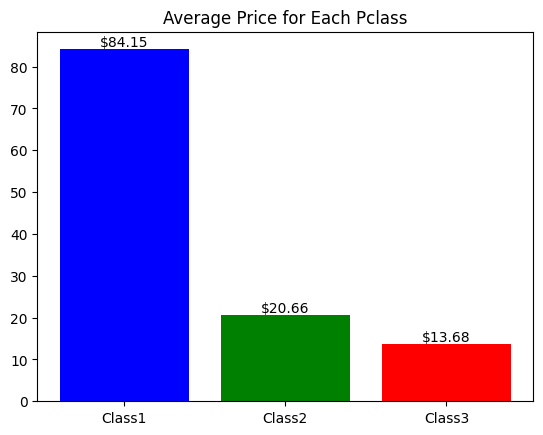

In [ ]:
average_passenger_class = df.groupby('Pclass').agg({'Fare':'mean'}).reset_index()

class1_avgfare = average_passenger_class.Fare[0]
class2_avgfare = average_passenger_class.Fare[1]
class3_avgfare = average_passenger_class.Fare[2]

# plot bar chart
x_labels_list = ['Class1', 'Class2', 'Class3']
y_values_list = [class1_avgfare,class2_avgfare,class3_avgfare]

plt.bar(x_labels_list,y_values_list,color=['blue','green','red'])
# show value of each bar
for index, value in enumerate(y_values_list):
    plt.text(index, value, '$'+str(round(value,2)), ha='center', va='bottom')
plt.title('Average Price for Each Pclass')
plt.show()


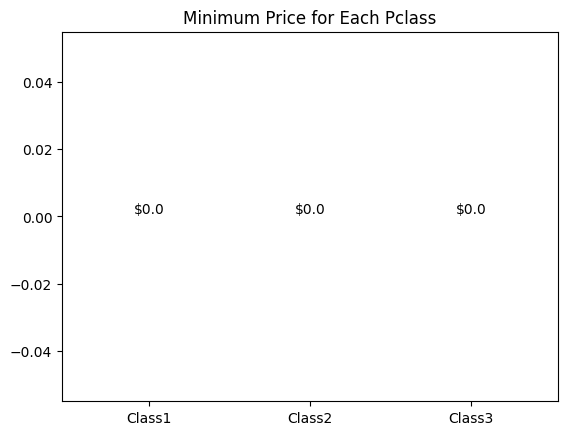

In [ ]:
min_passenger_class = df.groupby('Pclass').agg({'Fare':'min'}).reset_index()

class1_minfare = min_passenger_class.Fare[0]
class2_minfare = min_passenger_class.Fare[1]
class3_minfare = min_passenger_class.Fare[2]

# plot bar chart
x_labels_list = ['Class1', 'Class2', 'Class3']
y_values_list = [class1_minfare,class2_minfare,class3_minfare]

plt.bar(x_labels_list,y_values_list,color=['blue','green','red'])
# show value of each bar
for index, value in enumerate(y_values_list):
    plt.text(index, value, '$'+str(round(value,2)), ha='center', va='bottom')
plt.title('Minimum Price for Each Pclass')
plt.show()

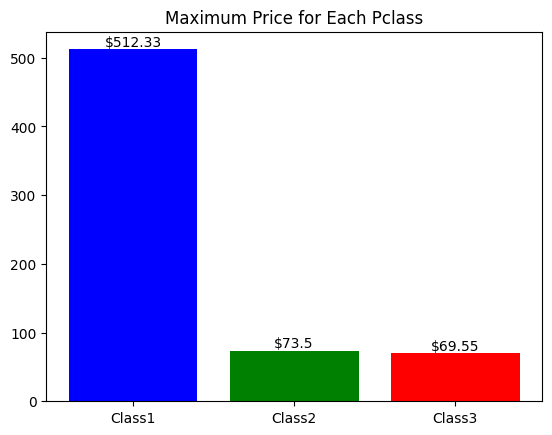

In [ ]:
max_passenger_class = df.groupby('Pclass').agg({'Fare':'max'}).reset_index()
class1_maxfare = max_passenger_class.Fare[0]
class2_maxfare = max_passenger_class.Fare[1]
class3_maxfare = max_passenger_class.Fare[2]

# plot bar chart
x_labels_list = ['Class1', 'Class2', 'Class3']
y_values_list = [class1_maxfare,class2_maxfare,class3_maxfare]

plt.bar(x_labels_list,y_values_list,color=['blue','green','red'])
# show value of each bar
for index, value in enumerate(y_values_list):
    plt.text(index, value, '$'+str(round(value,2)), ha='center', va='bottom')
plt.title('Maximum Price for Each Pclass')
plt.show()

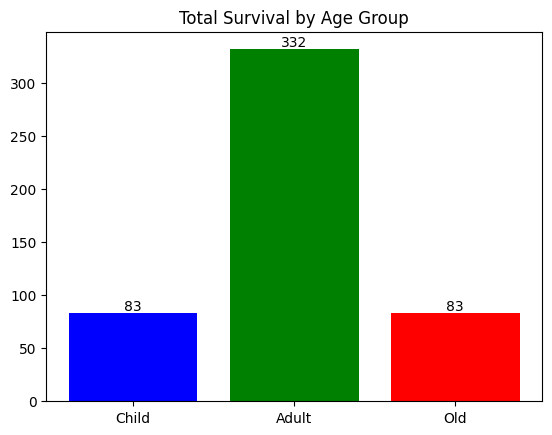

In [ ]:
# Which Age people survived the most 1-14 child , 14-30 adults , 30+ OLD
child_df = df[df.Age <= 15]
total_child_survived = child_df['Survived'].count()

adult_df = df[(df['Age'] > 14) & (df['Age'] <= 30)]
total_adult_survived = adult_df['Survived'].count()

old_df = df[df.Age > 30]
total_old_survived = child_df['Survived'].count()

# plot bar chart
x_labels_list = ['Child', 'Adult', 'Old']
y_values_list = [total_child_survived,total_adult_survived,total_old_survived]

plt.bar(x_labels_list,y_values_list,color=['blue','green','red'])
# show value of each bar
for index, value in enumerate(y_values_list):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.title('Total Survival by Age Group')
plt.show()

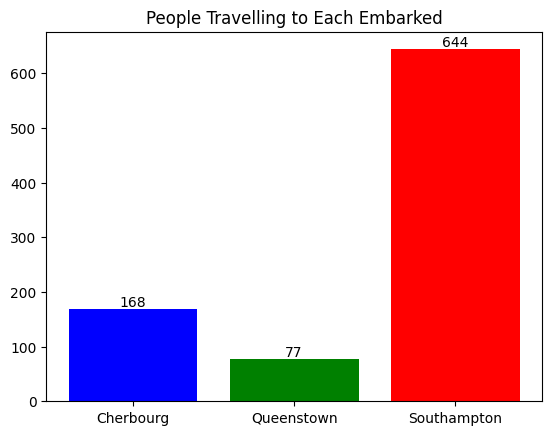

In [ ]:
# How many people were going to
# C = Cherbourg, Q = Queenstown, S = Southampton also how many males and females

destination_df = df.groupby('Embarked').count()
destination_df
C_df = destination_df[destination_df.index=='C']
traveling_C = C_df.loc['C', 'PassengerId']

Q_df = destination_df[destination_df.index=='Q']
traveling_Q = Q_df.loc['Q', 'PassengerId']

S_df = destination_df[destination_df.index=='S']
traveling_S = S_df.loc['S', 'PassengerId']

# plot bar chart
x_labels_list = ['Cherbourg', 'Queenstown', 'Southampton']
y_values_list = [traveling_C,traveling_Q,traveling_S]

plt.bar(x_labels_list,y_values_list,color=['blue','green','red'])
# show value of each bar
for index, value in enumerate(y_values_list):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.title('People Travelling to Each Embarked')
plt.show()

In [ ]:
# Remove unwanted observations
clean_df = df.drop(['PassengerId','Name','Ticket'],axis=1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
# Checking for Nan values
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
check_nan = clean_df.isna().values.any()
print(f"Nan values found in the dataframe?: {check_nan}")

# check how many nan in each column
clean_df.isna().sum()

Nan values found in the dataframe?: True


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Number of missing values
number_nan = clean_df['Age'].isna().values.sum()
print(f"There are {number_nan} missing values in the dataframe.")

number_nan = clean_df['Cabin'].isna().values.sum()
print(f"There are {number_nan} missing values in the dataframe.")

number_nan = clean_df['Embarked'].isna().values.sum()
print(f"There are {number_nan} missing values in the dataframe.")

There are 177 missing values in the dataframe.
There are 687 missing values in the dataframe.
There are 2 missing values in the dataframe.


In [ ]:
# Remove Cabin column. It has too many nan values
# clean_df.drop(['Cabin'],axis=1,inplace=True)
clean_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer


# Categorical and Numerical Columns
cat_col = clean_df.loc[:,df.dtypes==object]
num_col = clean_df.loc[:,df.dtypes!=object]
num_cols = num_col.columns

# fill the rows with NA value
num_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
num_mean.fit(num_col)

num_col = num_mean.transform(num_col)
num_col = pd.DataFrame(num_col,columns =num_cols)

# converting age to int
num_col['Age'] = num_col['Age'].astype(int)
num_col

total_df = pd.concat([cat_col,num_col],axis=1)


In [ ]:
# Checking for Nan values
check_nan = total_df.isna().values.any()
print(f"Nan values found in the dataframe?: {check_nan}")

# Removing the remaining rows with nan value
total_df.dropna(inplace=True)

Nan values found in the dataframe?: True


In [ ]:
total_df.isna().sum()

Sex         0
Cabin       0
Embarked    0
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
# label data
Y = total_df['Survived']

# Features data
X = total_df.drop('Survived',axis=1)
X.dtypes

Sex          object
Cabin        object
Embarked     object
Pclass      float64
Age           int64
SibSp       float64
Parch       float64
Fare        float64
dtype: object

In [ ]:
# Seperating features into numerical and categorical
categorical_X = X.loc[:,df.dtypes==object]
num_X = X.loc[:,df.dtypes!=object]

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
# minmax scalar for numerical features
# scaler = MinMaxScaler()
# scaler.fit(num_X)
# print(scaler.data_max_)

# using StandardScalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(num_X)
print(scaler.mean_)

numerical_features = scaler.transform(num_X)

# One hot encoding for categorical features
categorical_features = categorical_X.astype(str)

# Create instance of OneHotEncoder
ENCODER = OneHotEncoder()
ENCODER.fit(categorical_features)
#print(ENCODER.categories_)
encoded_categorical_features = ENCODER.transform(categorical_features).toarray()

# Concatenate both numerical features and encoded categorical features
features_data = np.concatenate([numerical_features,encoded_categorical_features],axis=1)


[ 1.1980198  35.03465347  0.44554455  0.44059406 76.10330099]


In [ ]:
# One hot encoding for Label
label_array = np.array(Y).reshape(-1,1)

# ENCODER = OneHotEncoder()
ENCODER.fit(label_array)
print(ENCODER.categories_)
encoded_Y = ENCODER.transform(label_array).toarray()

[array([0., 1.])]


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features_data,encoded_Y,test_size=.2)

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Model TRAINING; pass features and labels
knn.fit(X_train,y_train)

# Model PREDICTION. Pass Testing features only.
pred_labels_knn = knn.predict(X_test)

print(pred_labels_knn[1])
print(y_test[1])

# Convert arrays to lists for comparison
y_pred_list = pred_labels_knn.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy_knn = 0
for x in range(len(pred_labels_knn)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy_knn += 1
accuracy_knn = round(accuracy_knn/len(pred_labels_knn)*100,2)
print(f"The accuracy of the KNN Model is {accuracy_knn}%")

[1. 0.]
[1. 0.]
The accuracy of the KNN Model is 70.73%


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

pred_labels_dec_tree = dec_tree.predict(X_test)

# Convert arrays to lists for comparison
y_pred_list = pred_labels_dec_tree.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy_decision_tree = 0
for x in range(len(pred_labels_dec_tree)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy_decision_tree += 1
accuracy_decision_tree = round(accuracy_decision_tree/len(pred_labels_dec_tree)*100,2)
print(f"The accuracy of the Decision Tree Model is {accuracy_decision_tree}%")

The accuracy of the Decision Tree Model is 85.37%


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(X_train,y_train)

pred_lbls_rf = random.predict(X_test)
pred_lbls_rf.shape

# Convert arrays to lists for comparison
y_pred_list = pred_lbls_rf.tolist()
y_test_list = y_test.tolist()

# Accuracy of the model
accuracy_random_forest = 0
for x in range(len(y_pred_list)):
  if y_pred_list[x] == y_test_list[x]:
    accuracy_random_forest += 1
accuracy_random_forest = round(accuracy_random_forest/len(y_pred_list)*100,2)
print(f"The accuracy of the Random Forest Model is {accuracy_random_forest}%")

The accuracy of the Random Forest Model is 82.93%
